# AIRDOS parser for data from ABSjets flight at winter 2020

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Select AIRDOS

In [2]:
fto = '/storage/experiments/2020/1204_ABSJets/AIRDOS/98' #  File to Open
fto = '/storage/experiments/2020/1204_ABSJets/AIRDOS/DD' #  File to Open
fto = "/storage/experiments/2021/03_REFLECT3/Airdos_98"
fto = "/storage/experiments/2021/03_REFLECT3/Airdos02A_DD"
#fto = '/storage/experiments/2020/1204_ABSJets/AIRDOS_C/9C' #  File to Open
#fto = '/storage/experiments/2020/1204_ABSJets/SPACEDOS/64' #  File to Open

#SWITCH_ON_AIRDOS = '2019-09-03 9:10'
SWITCH_ON_AIRDOS = '2020-10-28 9:10'
SWITCH_ON_AIRDOS = '2020-10-28 17:32:11'

'''
switch on
2020-10-28 17:33:07 56
2020-10-28 17:33:41 59

switch off
2020-12-05 17:36:43 3283941
2020-12-05 17:37:34 3283979
2020-12-05 17:38:11 3284017 (most precise)
'''

'\nswitch on\n2020-10-28 17:33:07 56\n2020-10-28 17:33:41 59\n\nswitch off\n2020-12-05 17:36:43 3283941\n2020-12-05 17:37:34 3283979\n2020-12-05 17:38:11 3284017 (most precise)\n'

## Load and plot data from AIRDOS

In [3]:
print (fto)

l=[]
l.extend(range(0,258))
df = pd.read_csv(fto+'/DATALOG.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print(df.loc[df[0]=='$AIRDOS'][[0,1,2,3,4]])

/storage/experiments/2021/03_REFLECT3/Airdos02A_DD
         0   1        2                                 3    4
0  $AIRDOS  G4  d2d1e0d  1290c00806a200912857a000a00000dd  NaN
3  $AIRDOS  G4  d2d1e0d  1290c00806a200912857a000a00000dd  NaN


In [4]:
rc = df.loc[df.index > df.loc[df[0]=='$AIRDOS'].index[0]]
rc = rc.loc[df[0]=='$CANDY']
rc.iloc[:5,8:]

,8,9,10,11,12,13,14,15,16,17,...,248,249,250,251,252,253,254,255,256,257
1,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25707.0,0.0,253.0
2,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25740.0,1.0,254.0
4,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25633.0,0.0,253.0
5,0,0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25645.0,1.0,253.0
6,0,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25593.0,2.0,253.0


Text(0, 0.5, 'Counts per 10 seconds [-]')

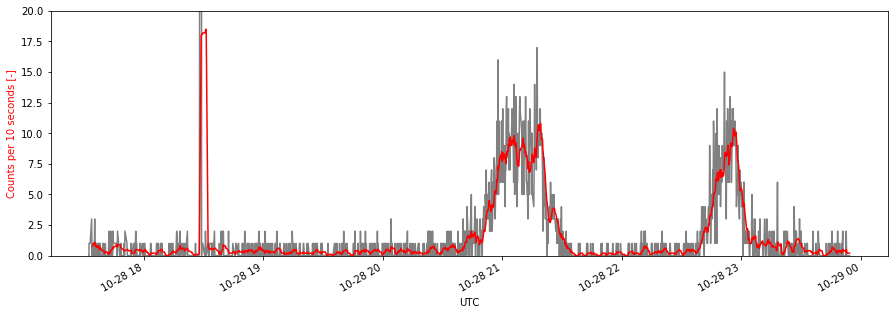

In [5]:
plt.figure(figsize=(15,5))

#rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc[range(8,255)].sum(axis=1)
#rc['sum'] = rc[range(10,255)].sum(axis=1)

rc['time'] = pd.to_datetime(pd.to_datetime(SWITCH_ON_AIRDOS) + pd.to_timedelta(rc[2], unit='s'))
rc = rc.set_index(['time'])

WINDOW = 10
rc['roll'] = rc['sum'].rolling(WINDOW).mean()

rc['sum'].plot(color='gray')
rc['roll'].plot(color='r')
plt.ylim([0,20])
plt.xlabel('UTC')
plt.ylabel('Counts per 10 seconds [-]', color='red')

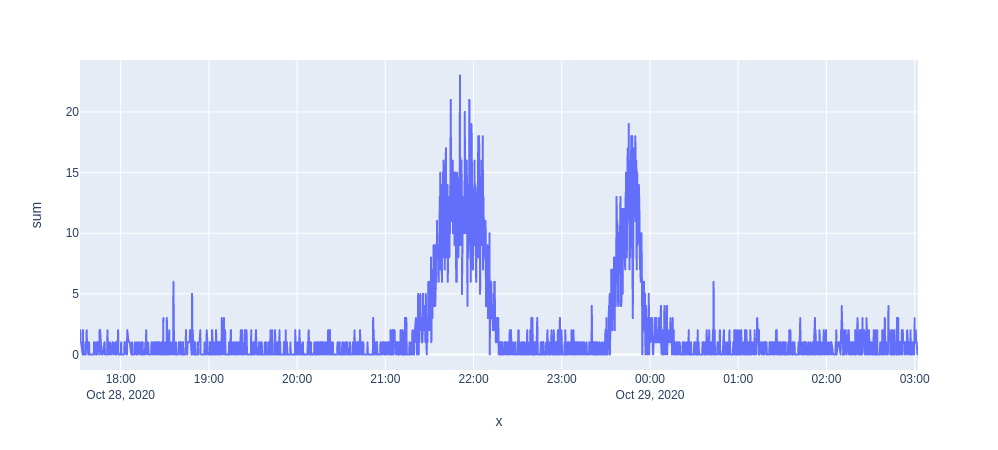

In [10]:
fig = px.line(rc, x=rc.index, y='sum')
fig.show()

# Load and plot telemetry data

In [10]:
ftt = glob.iglob(fto+"/*/*.csv") # generator, search immediate subdirectories 
tele = pd.DataFrame()
for f in ftt:
    #print(f)
    tele = pd.concat([tele, pd.read_csv(f)])
#tele

In [11]:
plt.figure(figsize=(15,5))

tele['time'] = pd.to_datetime(tele['UTC'], format='%Y-%m-%dT%H:%M:%SZ')
tele.set_index('time', inplace=True)
tele.sort_index(inplace=True)
plt.plot(tele['Altitude'])
plt.xlabel('UTC')
plt.ylabel('Altitude a.s.l. [ft]', color='blue')

KeyError: 'UTC'

<Figure size 1080x360 with 0 Axes>

# Combine AIRDOS and telemetry data

Text(0, 0.5, 'Counts per 10 seconds [-]')

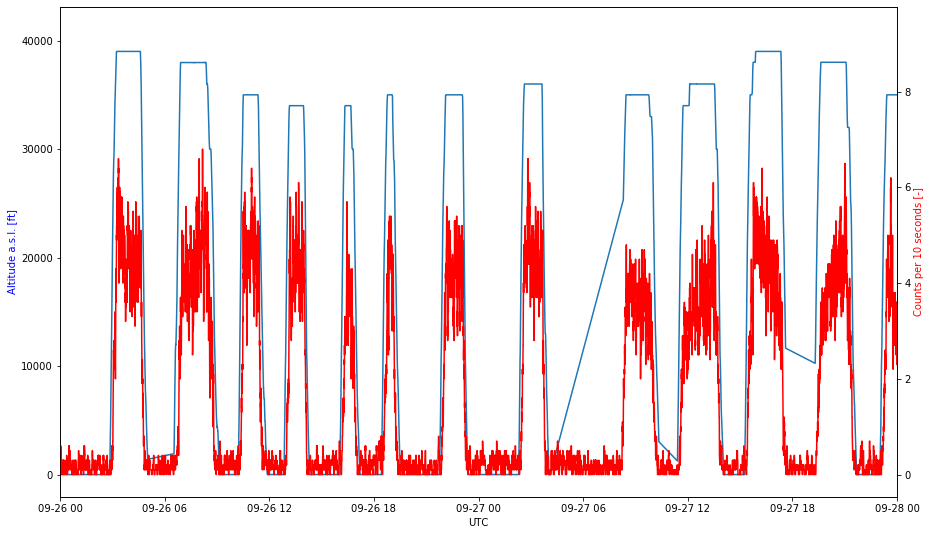

In [94]:
plt.figure(figsize=(15,10))

plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
plt.xlim(pd.Timestamp('2019-09-26'),pd.Timestamp('2019-09-28'))
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

plt.twinx()

rc['sum'].plot(color='r')
plt.ylabel('Counts per 10 seconds [-]', color='red')


# Plot with plotly

In [48]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=tele.index, y=tele.Altitude, name="Altitude"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=rc.index, y=rc['sum'], name="Counts"),
    secondary_y=True,
)



# Set x-axis title
fig.update_xaxes(title_text="UTC")

# Set y-axes titles
fig.update_yaxes(title_text="Altitude [ft]", color='blue', secondary_y=False)
fig.update_yaxes(title_text="Flux [2 cm<sup>2</sup> . (10 s)<sup>-1</sup>]", color='red', secondary_y=True)

fig.show()

NameError: name 'tele' is not defined

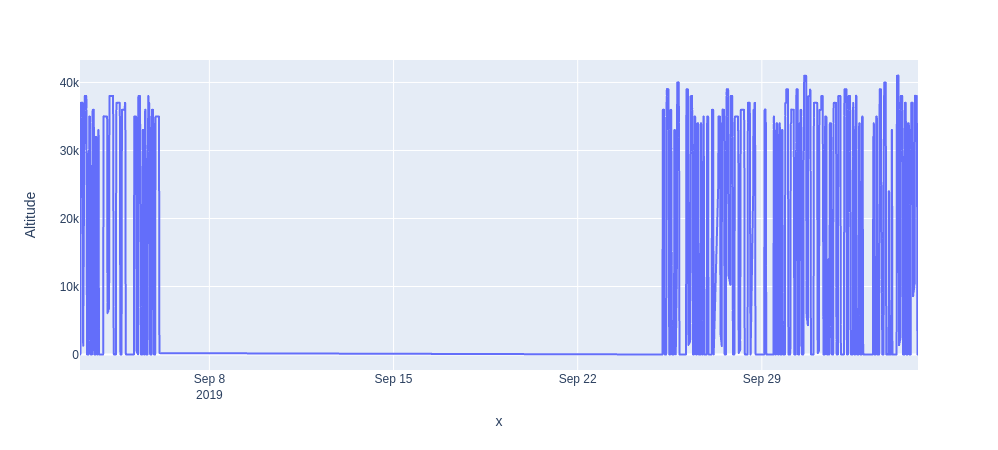

In [128]:
fig = px.line(tele, x=tele.index, y="Altitude")
fig.show()

In [179]:
import ipywidgets as widgets

In [189]:
fto = '/storage/aircraft/airdos/2019/TS/A016/200716-' #  File to Open
ftt = glob.iglob(fto+"/*/*.csv") # generator, search immediate subdirectories 
#tele = pd.DataFrame()
#for f in ftt:
    #print(f)
    #tele = pd.concat([tele, pd.read_csv(f)])


print(ftt)

ble = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)
display(ble)


<generator object _iglob at 0x7f529c5b1550>


DatePicker(value=None, description='Pick a Date')

# REFLECT 3

In [6]:
fto = '/storage/experiments/2021/01_AIRDOSC_NaITl_calibration/Na22/DATALOG.TXT' #  File to Open
fto = "/storage/experiments/2021/03_REFLECT3/Airdos_98/DATALOG.TXT"
#fto = "/storage/experiments/2021/03_REFLECT3/Airdos02A_DD/DATALOG.TXT"
#fto = '/storage/experiments/2021/01_AIRDOSC_NaITl_calibration/Mn45_Zn65/DATALOG.TXT' #  File to Open
#fto = '/storage/experiments/2020/1204_ABSJets/AIRDOS/98/DATALOG.TXT' #  File to Open
fto = '/storage/experiments/2020/1204_ABSJets/AIRDOS/DD/DATALOG.TXT' #  File to Open

print (fto)

l=[]
#l.extend(range(0,261))
l.extend(range(0,261))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )
#df = pd.read_table(fto, sep=',', header=None,comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

#df.drop(df[df[0]=='$STROKE'].index, inplace=True)
#df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS'][3]
print (sn[0])
#df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/storage/experiments/2020/1204_ABSJets/AIRDOS/DD/DATALOG.TXT
1290c00806a200912857a000a00000dd


In [7]:
run = 0

runs = []
LatDD = np.nan
LatD = np.nan
LatM = np.nan
LonDD = np.nan
LonD = np.nan
LonM = np.nan

for i,r in df.iterrows():
    if (r[0] == '$AIRDOS'):
        run = run + 1
        date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
        time = 0
        timedelta = 0
        timeoffset = 0
        datedate = pd.NaT
        altitude = np.nan
        Lat = np.nan
        Lon = np.nan
        speed = np.nan
        flag = 0
        flagrun = 0
        print (run, end='')
        
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
        speed = r[7]
        LatHem = r.astype(str)[4]
        LonHem = r.astype(str)[6]
        if (LatHem=='S'):     # Conferr DDMM.MM to DD.DD
            LatS = -1
        else:
            LatS = 1
        if (LonHem=='W'):
            LonS = -1
        else:
            LonS = 1
        Lat = float(r[3])
        LatD = np.trunc(Lat/100)
        LatM = ((Lat/100) - LatD) * 100
        LatDD = LatD + LatM/60.0
        LatDD = LatDD * LatS  
        Lon = float(r[5])
        LonD = np.trunc(Lon/100)
        LonM = ((Lon/100) - LonD) * 100
        LonDD = LonD + LonM/60.0
        LonDD = LonDD * LonS         
       
    if (r[0] == '$GPGGA'):
        altitude = r[9]

    if (r[0] == '$TIME'):
        if (not pd.isnull(date)) :
            flag = 1
            timeoffset = pd.to_numeric(r[1])
            datedate = date

    df.at[i,'date'] = date
    df.at[i,'altitude'] = altitude
    df.at[i,'speed'] = speed

    if (r[0] == '$CANDY'):
        time = pd.to_numeric(r[2])  # read seconds from power on
        if (flag == 1):
            timedelta = datedate
            if (flagrun == 0):
                runs.append([run,date,timedelta])
                flagrun = 1
            #flag = 0
        date_line = datedate + pd.to_timedelta(time - timeoffset, unit='s')
        
        try:
            df.at[i,'date'] = date_line
            df.at[i,'run'] = run
            df.at[i,'lat'] = LatDD
            df.at[i,'lon'] = LonDD
            df.at[i,'latD'] = LatD
            df.at[i,'lonD'] = LonD
            df.at[i,'latM'] = LatM
            df.at[i,'lonM'] = LonM
            df.at[i,'latHem'] = LatHem
            df.at[i,'lonHem'] = LonHem
        except:
            pass
        
  
FROM = pd.to_datetime('2019-11-27 00:00:00')
TO = pd.to_datetime('2019-11-29 01:10:00')
#FROM = pd.to_datetime('2019-11-28 18:55:00')
#TO = pd.to_datetime('2019-11-29 01:00:00')
#PRG-AGP
#FROM = pd.to_datetime('2019-11-28 18:55:00')
#TO = pd.to_datetime('2019-11-28 20:55:00')
#AGP-PRG
#FROM = pd.to_datetime('2019-11-28 23:00:00')
#TO = pd.to_datetime('2019-11-29 00:30:00')


dfo = df.copy()
#dfo = dfo.loc[(dfo['date']>FROM)&(dfo['date']<TO)]

#01/2002, FL-27
#DEG MIN N/S DEG MIN E/W FEET TIME(MIN)
dfdeg = df[['latD','latM','latHem','lonD','lonM','lonHem','altitude','run','date']].copy()
dfdeg['altitude'] *= 3.28084
dfdeg['minute'] = 0
dfo['minute'] = 0
dfdeg = dfdeg.loc[(dfdeg['date']>FROM)&(dfdeg['date']<TO)]
#dfdeg.reset_index(inplace=True)

dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$AIRDOS'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$AIRDOS'].index, inplace=True)

'''
TODO !!!!!!!!!!!!!!!!!!!!
# calculate empty dates
for x in runs:
    print x
    dfo.loc[(dfo['date'].isnull())&(dfo['run'] == x[0]),'TBD'] = x[0]
    dfo.loc[dfo['TBD'] == x[0],'time'] = pd.to_datetime(x[1] + (pd.to_timedelta(pd.to_numeric(dfo.loc[dfo['TBD'] == x[0],2]), unit='s')) - pd.to_timedelta(x[2], unit='s'))
    dfo.loc[(dfo['time'].isnull())&(dfo['run'] == x[0]),'time'] = dfo.loc[(dfo['time'].isnull())&(dfo['run'] == x[0]),'date']

dfo.drop(['TBD','date'], axis = 1, inplace = True, errors = 'ignore')
'''
print ()

for f in glob.iglob("./output/*.csv"): # delete all output files 
    print ('Deleting', f)
    #os.remove(f)


dfo.set_index('date', inplace = True)

#01/2002, FL-27
#DEG MIN N/S DEG MIN E/W FEET TIME(MIN)

for x in runs: 
    filename = '../output/' + str(timedelta) + '_' + str(sn[0])

    # Disimetric values
    #dfo.loc[dfo['run'] == x[0],'minute'] = (pd.to_timedelta(dfo.loc[dfo['run'] == x[0]].index-(x[1] + pd.to_timedelta(-x[2], unit='s')))).astype('timedelta64[m]').fillna(0).astype(int)
    dfo.loc[dfo['run'] == x[0]].to_csv(filename + '.csv')


print('End')

1
End


In [20]:
dfo

,0,1,2,3,4,5,6,7,8,9,...,run,lat,lon,latD,lonD,latM,lonM,latHem,lonHem,minute
date,,,,,,,,,,,,,,,,,,,,,
NaT,$CANDY,0,10,0,3,16274,5364,20,1,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaT,$CANDY,1,22,0,3,16073,5546,13,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaT,$CANDY,0,10,0,0,15583,5935,23,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaT,$CANDY,1,22,0,0,15836,5744,17,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaT,$CANDY,2,34,0,2,15511,6023,23,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24 15:37:42,$GPTXT,01,01,02,ANTSTATUS=OK,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-03-24 15:38:47,$TIME,22972,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-03-24 15:38:59,$CANDY,1615,22984,0,2,14986,6502,19,0,0,...,2.0,50.09771,14.285339,50.0,14.0,5.86262,17.12034,N,E,0


Populating the interactive namespace from numpy and matplotlib


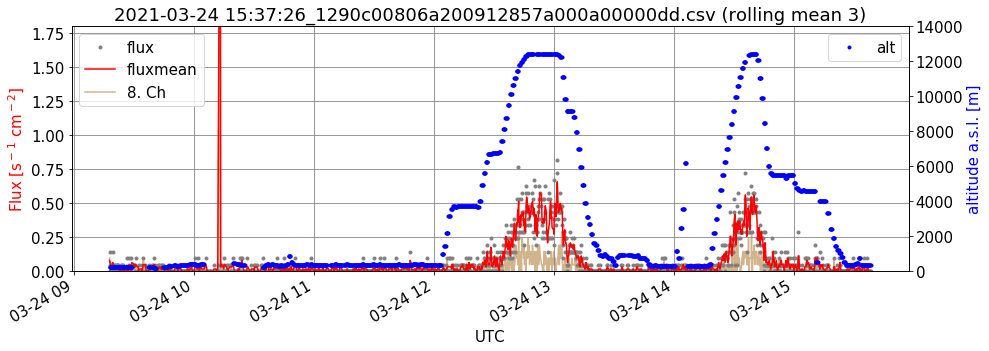

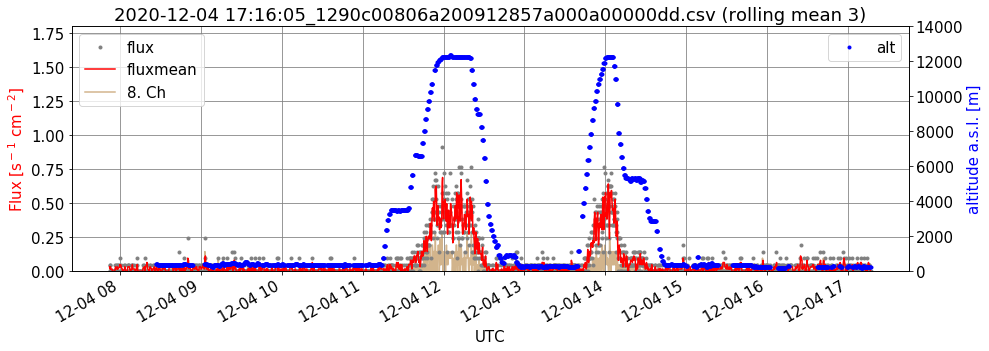

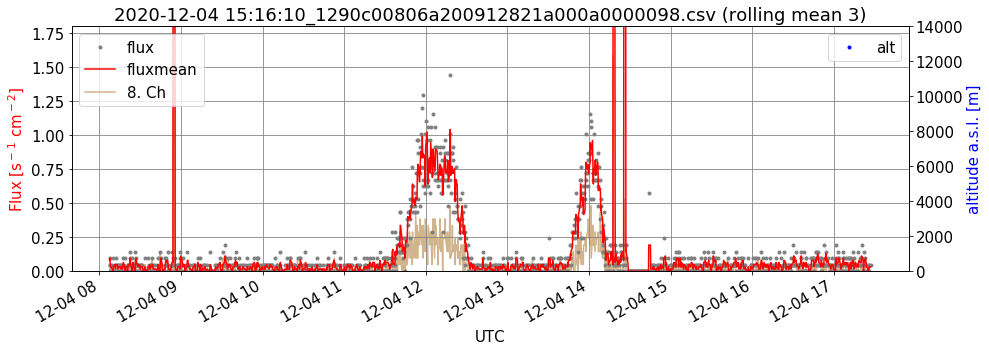

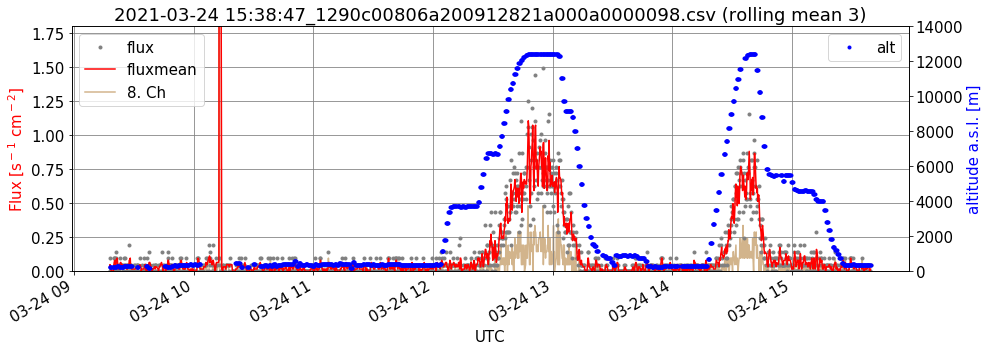

In [8]:
%pylab inline --no-import-all
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 8
LAST_CHANNEL=254
WINDOW = 3

for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    try:
        plt.figure(figsize=(15,5))
        plt.tight_layout()
        xx = pd.read_csv(f)
        xx['date'] = pd.to_datetime(xx['date'])
        xx.set_index('date', inplace = True)
        #xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
        #xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
        #xx = xx.loc['2021-03-24 12:00:00':'2021-03-24 14:00:00']

        
        xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))/2/10.4

        xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

        xx['flux'].plot(c='gray', linestyle='', marker='.')
        xx['fluxmean'].plot(c='red')
        (xx.iloc[:,NOISE_LEVEL]/2/10.4).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

        s = f.split('/')
        plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ')')
        plt.ylim([0,1.8])
        plt.xlabel('UTC')
        plt.ylabel(r'Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
        plt.legend(loc=2)

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        ax = plt.twinx()
                
        plt.ylim([0,14000])
        xx['altitude'].plot(c='b', label='alt', marker='.', linewidth='2', linestyle='none', drawstyle='steps-mid')
        plt.ylabel('altitude a.s.l. [m]', color='blue')

        plt.legend()
        #break
    except:
        pass



# Save telemetry from GPS to file

In [36]:
xx[['altitude', 'lon', 'lat']].dropna().drop_duplicates().to_csv('REFLECT3.csv')

# Spectrum

0.03850279329608939 -0.040592178770949686
../output/2021-03-24 15:37:26_1290c00806a200912857a000a00000dd.csv
      1  index      x  deposit
7   0.0      7  0.181      0.0
8   0.0      8  0.219      0.0
9   0.0      9  0.257      0.0
10  0.0     10  0.295      0.0
11  0.0     11  0.333      0.0
../output/2020-12-04 17:16:05_1290c00806a200912857a000a00000dd.csv
        1  index      x  deposit
7   382.0      7  0.181   69.142
8   241.0      8  0.219   52.779
9   182.0      9  0.257   46.774
10  138.0     10  0.295   40.710
11   97.0     11  0.333   32.301
../output/2020-12-04 15:16:10_1290c00806a200912821a000a0000098.csv
         1  index      x  deposit
7   1187.0      7  0.181  214.847
8    388.0      8  0.219   84.972
9    244.0      9  0.257   62.708
10   150.0     10  0.295   44.250
11    91.0     11  0.333   30.303
../output/2021-03-24 15:38:47_1290c00806a200912821a000a0000098.csv
      1  index      x  deposit
7   0.0      7  0.181      0.0
8   0.0      8  0.219      0.0
9   0.0  

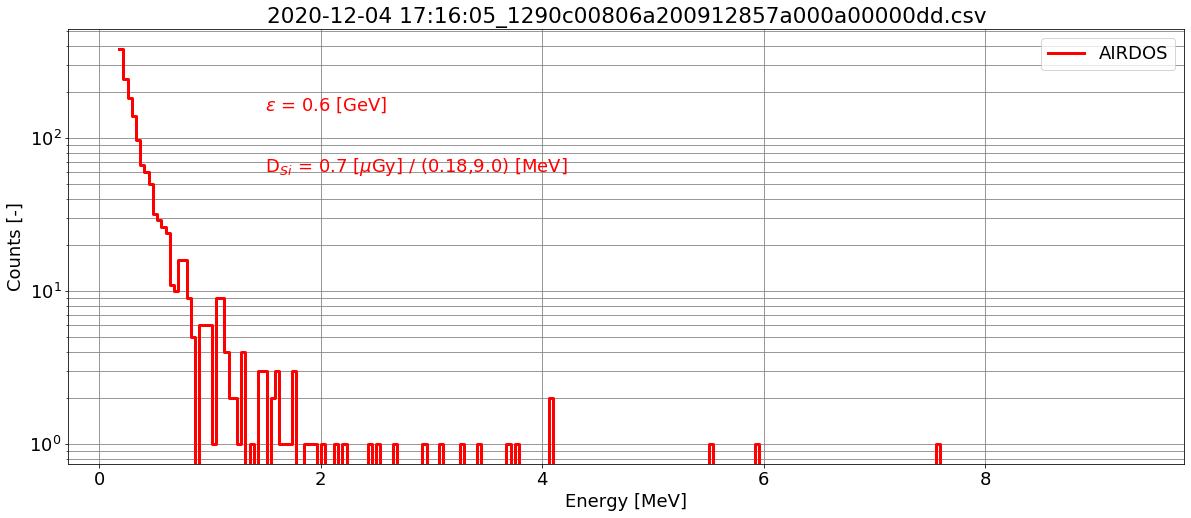

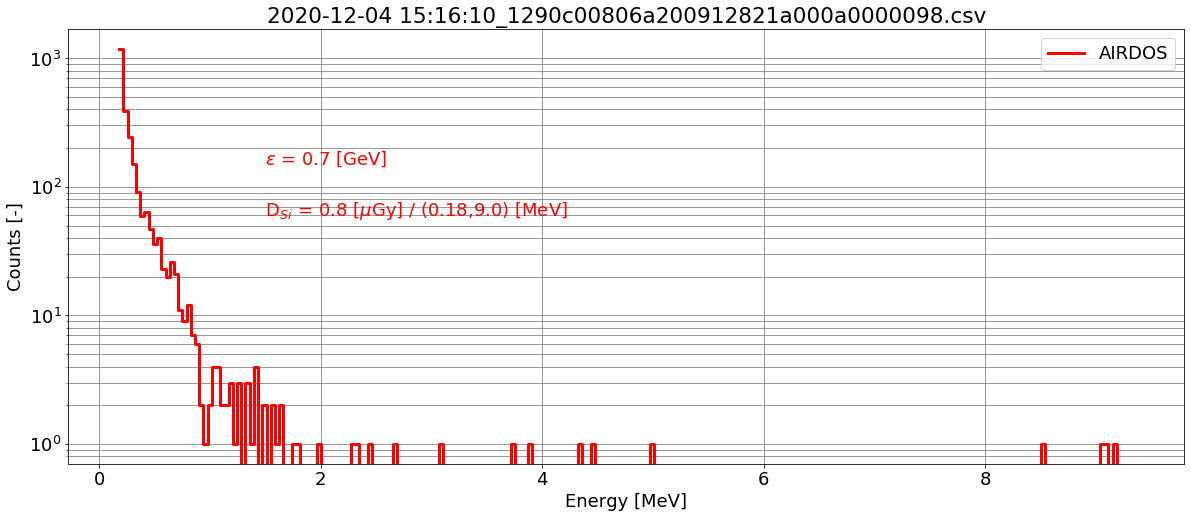

In [9]:
matplotlib.rcParams.update({'font.size': 18})

# DD
LOW_ENERGY = 7 
CH = 5
# 98
#LOW_ENERGY = 8 
#CH = 7

FROM_ENERGY = 0.18
TO_ENERGY = 9.0

l = np.array([[29+4, 1],[208+4,1]]) # Calibration
r = np.array([1.23, 8.122])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])

# force calibration coeficients
coef[0] = 0.038
coef[1] = 0.105
    
    
for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    try:                
        df = pd.read_csv(f)
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace = True)
        
        # Uncomment this if you are interested in a specific time interval
        #xx = df.loc['2019-01-24 05:00:00':'2019-01-24 13:00:00']
        #from 2019-11-28 18:55 to 2019-11-28 20:55 was used for the flight PRG-AGP
        #from 2019-11-28 23:00 to 2019-11-29 00:30 was used for the flight AGP-PRG
        xx = df.loc['2020-12-04 11:50:00':'2020-12-04 12:20:00'] # REFLECT 2
        #xx = df.loc['2021-03-24 12:40:00':'2021-03-24 13:05:00'] # REFLECT 3        
        #xx = df
        ener1 = xx.iloc[:,LOW_ENERGY:249].sum()
        e = pd.DataFrame()
        e['1'] = ener1
        e['index'] = pd.to_numeric(ener1.index)
        e['x'] = (e['index']-CH) * coef[0] + coef[1]
        e['deposit'] = e['1'] * e['x']
        depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV

        dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) #* 1.1

        # size of the chip (20 mm · 10 mm), 
        # the thickness of the depletion layer (0.3 mm), 
        # and the density of silicon (2.33 g cm^3)
        # 0.1398e-3 kg
        #dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h
        
        print(f)
        print(e[:5])
        
        if (depener > 0):
            plt.figure(figsize=(20,8))
            plt.tight_layout()
            s = f.split('/')
            plt.title(s[len(s)-1])
            plt.yscale('log')
            #plt.ylim([0.9,1e7])
            #plt.xlim([0.1,6])

            plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-post', label='AIRDOS')

            plt.text(1.5, 1.5e2, r'$\epsilon$ = ' + str(round(depener/1e3,1)) + ' [GeV]', fontsize=18, color='r')
            plt.text(1.5, 6e1, r'D$_S$$_i$ = ' + str(round(dose,1)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')

            plt.legend()
            plt.xlabel('Energy [MeV]')
            plt.ylabel('Counts [-]')
            plt.grid(b=True, which='major', color='grey', linestyle='-')
            plt.grid(b=True, which='minor', color='grey', linestyle='-')

    except:
        pass


In [96]:
e[:10]

,1,index,x,deposit
8,371.0,8,0.181,67.151
9,274.0,9,0.219,60.006
10,151.0,10,0.257,38.807
11,140.0,11,0.295,41.300
12,96.0,12,0.333,31.968
13,78.0,13,0.371,28.938
14,66.0,14,0.409,26.994
15,55.0,15,0.447,24.585
16,48.0,16,0.485,23.280
17,32.0,17,0.523,16.736


## AIRDOS NaI(Tl) calibration

In [43]:
fto = '/storage/experiments/2021/01_AIRDOSC_NaITl_calibration/Na22/DATALOG.TXT' #  File to Open
#fto = '/storage/experiments/2021/01_AIRDOSC_NaITl_calibration/Mn45_Zn65/DATALOG.TXT' #  File to Open
fto = '/storage/experiments/2020/1204_ABSJets/AIRDOS/98/DATALOG.TXT' #  File to Open

print (fto)

l=[]
#l.extend(range(0,261))
l.extend(range(0,261))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )
#df = pd.read_table(fto, sep=',', header=None,comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

#df.drop(df[df[0]=='$STROKE'].index, inplace=True)
#df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS'][3]
print (sn[0])
#df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/storage/experiments/2020/1204_ABSJets/AIRDOS/98/DATALOG.TXT
1290c00806a200912821a000a0000098


0.03850279329608939 -0.040592178770949686


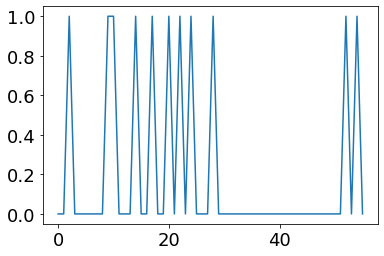

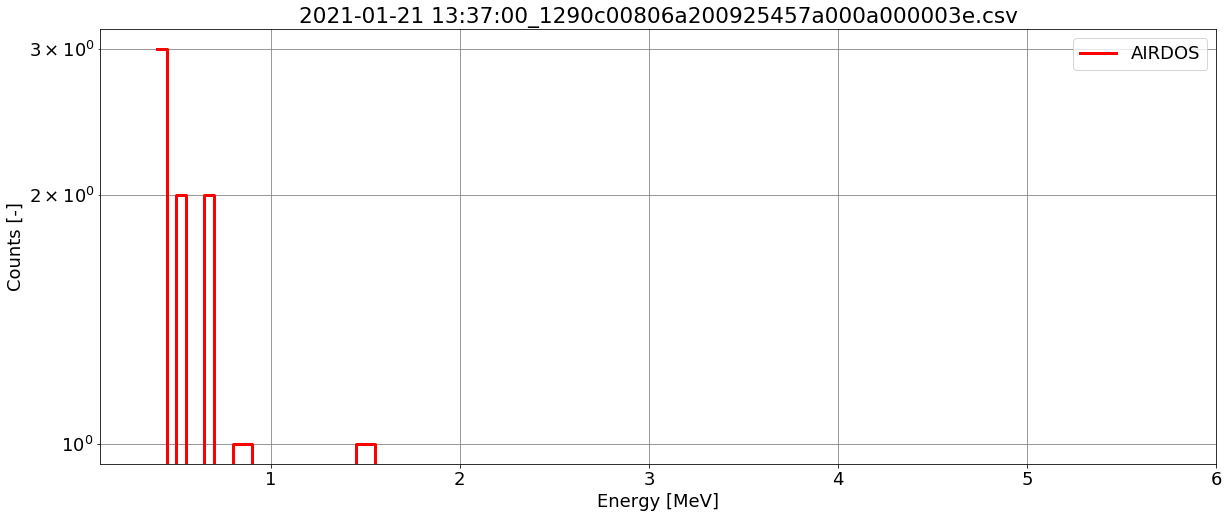

In [44]:
matplotlib.rcParams.update({'font.size': 18})

FROM_ENERGY = 0.01
TO_ENERGY = 9.0

l = np.array([[29+4, 1],[208+4,1]]) # Calibration
r = np.array([1.23, 8.122])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])

# force calibration coeficients
coef[0]=0.05
coef[1]=0.4
    
    
LOW_ENERGY = 14

#df = dfo
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace = True)

FROM = 100
TO = 200

xx = df[FROM:TO].loc[df[0]=='$CANDY'].copy()
xx['flux'] = (xx.iloc[:,13:250].sum(axis=1))
xx.reset_index(inplace=True)
plt.plot(xx['flux'])

ener1 = xx.iloc[:,LOW_ENERGY:250].sum()
e = pd.DataFrame()
e['1'] = ener1
e['index'] = pd.to_numeric(ener1.index)
e['x'] = (e['index']-13) * coef[0] + coef[1]
e['deposit'] = e['1'] * e['x']
depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV

dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) #* 1.1

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1398e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h


if (depener > 0):
    plt.figure(figsize=(20,8))
    plt.tight_layout()
    s = f.split('/')
    plt.title(s[len(s)-1])
    plt.yscale('log')
    #plt.ylim([0.9,1e7])
    plt.xlim([0.1,6])

    plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-post', label='AIRDOS')

    #plt.text(1.5, 30, r'$\epsilon$ = ' + str(round(depener*1.1,1)) + ' [MeV]', fontsize=18, color='r')
    #plt.text(1.5, 20, r'D$_S$$_i$ = ' + str(round(dose*1.1*2.71,2)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
    #plt.text(1.5, 30, r'$\epsilon$ = ' + str(round(depener,1)) + ' [MeV]', fontsize=18, color='r')
    #plt.text(1.5, 20, r'D$_S$$_i$ = ' + str(round(dose,2)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')

    plt.legend()
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Counts [-]')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='-')



In [230]:
e

,1,index,x,deposit
13,20.0,13,0.10,2.00
14,17.0,14,0.22,3.74
15,8.0,15,0.34,2.72
16,8.0,16,0.46,3.68
17,8.0,17,0.58,4.64
...,...,...,...,...
244,0.0,244,27.82,0.00
245,0.0,245,27.94,0.00
246,0.0,246,28.06,0.00
247,0.0,247,28.18,0.00


In [182]:
e

,1,index,x,deposit
13,952.0,13,0.10,95.20
14,768.0,14,0.22,168.96
15,751.0,15,0.34,255.34
16,916.0,16,0.46,421.36
17,786.0,17,0.58,455.88
...,...,...,...,...
243,0.0,243,27.70,0.00
244,0.0,244,27.82,0.00
245,0.0,245,27.94,0.00
246,0.0,246,28.06,0.00
